# <a href=https://competitions.codalab.org/competitions/16151>The Movie Recommendation Challenge</a> 

<i> Adapted from original code of Isabelle Guyon by the Yellow Team:<br>
Sihem ABDOUN, Stephen BATIFOL, Abdallah BENZINE, Abdelhak LOUKKAL, Clément THIERRY and Yaohui WANG</i>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 

## Introduction


In [14]:
codedir = 'sample_code/'                        # Change this to the directory where you put the code
from sys import path; path.append(codedir)
%matplotlib inline
import seaborn as sns; sns.set()

ImportError: No module named seaborn

## Fetch the data and load it

In [15]:
datadir = 'public_data/'                        # Change this to the directory where you put the input data
dataname = 'movierec'
basename = datadir  + dataname
!ls $basename*

'ls' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [3]:
import data_io
import eval
reload(data_io)
data = data_io.read_as_df(basename)                          # The data are loaded as a Pandas Data Frame
#data.to_csv(basename + '_train.csv', index=False)           # This allows saving the data in csv format

Reading public_data/movierec_train from AutoML format
Number of examples = 105000
Number of features = 54


In [70]:
data

,user_id,movie_id,age_-18,age_18-24,age_25-34,age_35-44,age_45-49,age_50-55,age_56+,job_other,...,movie_genre_Romance,movie_genre_Sci-Fi,movie_genre_Thriller,movie_genre_War,movie_genre_Western,compatibility_vector,user_average_rating,movie_average_rating,constant_1,target
0,4611,1357,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0.370,3.276,3.807,1,4
1,2777,280,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0.392,3.498,3.571,1,4
2,3411,3174,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.336,2.732,3.485,1,4
3,2551,2138,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.707,3.303,3.843,1,4
4,955,3685,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0.616,3.580,3.593,1,4
5,851,3510,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0.431,3.592,3.759,1,4
6,2116,2311,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0.403,3.555,3.417,1,4
7,2924,1617,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0.668,3.957,4.219,1,2
8,2750,3535,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.727,4.295,3.219,1,4
9,1151,1339,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0.416,3.773,3.344,1,3


In [4]:
data.head()

,user_id,movie_id,age_-18,age_18-24,age_25-34,age_35-44,age_45-49,age_50-55,age_56+,job_other,...,movie_genre_Romance,movie_genre_Sci-Fi,movie_genre_Thriller,movie_genre_War,movie_genre_Western,compatibility_vector,user_average_rating,movie_average_rating,constant_1,target
0,4611,1357,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0.370,3.276,3.807,1,4
1,2777,280,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0.392,3.498,3.571,1,4
2,3411,3174,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.336,2.732,3.485,1,4
3,2551,2138,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.707,3.303,3.843,1,4
4,955,3685,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0.616,3.580,3.593,1,4


In [5]:
data.describe() 

,user_id,movie_id,age_-18,age_18-24,age_25-34,age_35-44,age_45-49,age_50-55,age_56+,job_other,...,movie_genre_Romance,movie_genre_Sci-Fi,movie_genre_Thriller,movie_genre_War,movie_genre_Western,compatibility_vector,user_average_rating,movie_average_rating,constant_1,target
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.00000,105000.000000,105000.000000,...,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.0,105000.000000
mean,3021.651229,1867.415267,0.027305,0.184552,0.393800,0.199210,0.083571,0.07220,0.039362,0.131714,...,0.148848,0.156590,0.188200,0.067743,0.021552,0.418096,3.581418,3.583144,1.0,3.583362
std,1727.189733,1095.206784,0.162971,0.387936,0.488594,0.399408,0.276745,0.25882,0.194455,0.338181,...,0.355940,0.363416,0.390874,0.251305,0.145217,0.203292,0.436782,0.543914,0.0,1.117683
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.056000,1.015000,1.000000,1.0,1.000000
25%,1503.000000,1030.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.223000,3.318000,3.262000,1.0,3.000000
50%,3064.000000,1841.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.401000,3.613000,3.680000,1.0,4.000000
75%,4472.000000,2781.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.549000,3.882000,3.976000,1.0,4.000000
max,6040.000000,3952.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.417000,4.957000,5.000000,1.0,5.000000


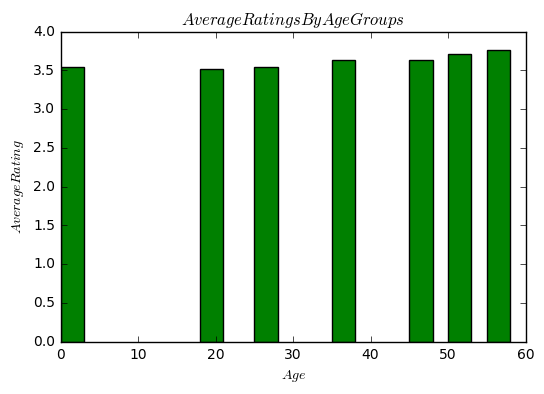

In [491]:
import matplotlib.pyplot as plt

under18 = np.array(data[data["age_-18"]==1])
from18to24 = np.array(data[data["age_18-24"]==1])
from25to34 = np.array(data[data["age_25-34"]==1])
from35to44 = np.array(data[data["age_35-44"]==1])
from45to49 = np.array(data[data["age_45-49"]==1])
from50to55 = np.array(data[data["age_50-55"]==1])
over56 = np.array(data[data["age_56+"]==1])

avergaeUnder18=np.mean(under18[:,-1])
avergaeFrom18to24 = np.mean(from18to24[:,-1])
avergaeFrom25to34 = np.mean(from25to34[:,-1])
avergaeFrom35to44 = np.mean(from35to44[:,-1])
avergaeFrom45to49 = np.mean(from45to49[:,-1])
avergaeFrom50to55 = np.mean(from50to55[:,-1])
over56 = np.mean(over56[:,-1])

averagesByAge=np.array([avergaeUnder18,avergaeFrom18to24,avergaeFrom25to34,avergaeFrom35to44,avergaeFrom45to49,avergaeFrom50to55,over56])

plt.figure()
plt.bar([0,18,25,35,45,50,55], averagesByAge, 3, color="g")
plt.xlabel("$Age$")
plt.ylabel("$Average Rating$") #$$ change apearence of font
plt.title("$Average Ratings By Age Groups$")
plt.savefig("Average Ratings By Age Groups.png") #to save the file

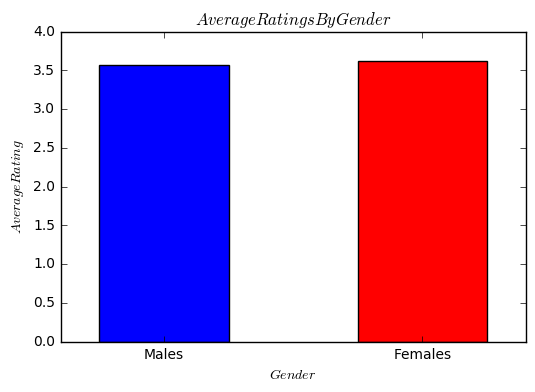

In [492]:
males = np.array(data[data["gender_M"]==1])
females = np.array(data[data["gender_F"]==1])

averageMales=np.mean(males[:,-1])
averageFemales=np.mean(females[:,-1])

averageByGender=np.array([averageMales,averageFemales])
averageByGender
plt.figure()

plt.bar(range(2),averageByGender , 0.5, color="br",align='center')
plt.xticks(range(2), ["Males","Females"])

plt.xlabel("$Gender$")
plt.ylabel("$Average Rating$") #$$ change apearence of font
plt.title("$Average Ratings By Gender$")
plt.savefig("Average Ratings By Gender.png") #to save the file

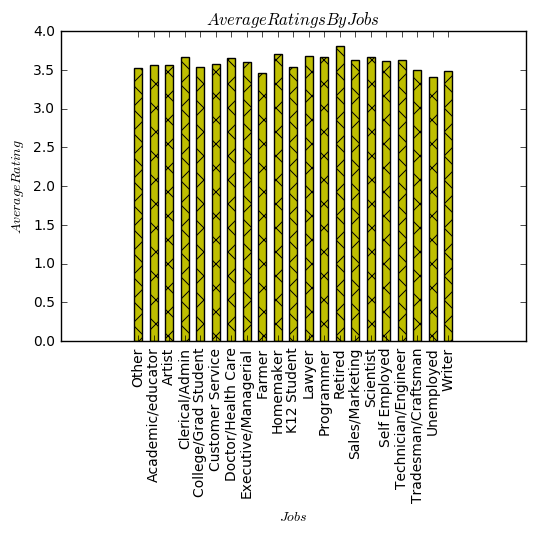

In [493]:
job_other = np.array(data[data["job_other"]==1])
job_academicOreducator = np.array(data[data["job_academic/educator"]==1])
job_artist = np.array(data[data["job_artist"]==1])
job_clericalOradmin = np.array(data[data["job_clerical/admin"]==1])
job_collegeOrgrad_student = np.array(data[data["job_college/grad student"]==1])
job_customer_service = np.array(data[data["job_customer service"]==1])
job_doctorOrhealth_care = np.array(data[data["job_doctor/health care"]==1])
job_executiveOrmanagerial = np.array(data[data["job_executive/managerial"]==1])
job_farmer = np.array(data[data["job_farmer"]==1])
job_homemaker = np.array(data[data["job_homemaker"]==1])
job_K12_student = np.array(data[data["job_K-12 student"]==1])
job_lawyer = np.array(data[data["job_lawyer"]==1])
job_programmer = np.array(data[data["job_programmer"]==1])
job_retired = np.array(data[data["job_retired"]==1])
job_salesOrmarketing = np.array(data[data["job_sales/marketing"]==1])
job_scientist = np.array(data[data["job_scientist"]==1])
job_self_employed = np.array(data[data["job_self-employed"]==1])
job_technicianOrengineer = np.array(data[data["job_technician/engineer"]==1])
job_tradesmanOrcraftsman = np.array(data[data["job_tradesman/craftsman"]==1])
job_unemployed = np.array(data[data["job_unemployed"]==1])
job_writer = np.array(data[data["job_writer"]==1])


avergaejob_other=np.mean(job_other[:,-1])
avergaejob_academicOreducator=np.mean(job_academicOreducator[:,-1])
avergaejob_artist=np.mean(job_artist[:,-1])
avergaejob_clericalOradmin=np.mean(job_clericalOradmin[:,-1])
avergaejob_collegeOrgrad_student=np.mean(job_collegeOrgrad_student[:,-1])
avergaejob_customer_service=np.mean(job_customer_service[:,-1])
avergaejob_doctorOrhealth_care=np.mean(job_doctorOrhealth_care[:,-1])
avergaejob_executiveOrmanagerial=np.mean(job_executiveOrmanagerial[:,-1])
avergaejob_farmer=np.mean(job_farmer[:,-1])
avergaejob_homemaker=np.mean(job_homemaker[:,-1])
avergaejob_K12_student=np.mean(job_K12_student[:,-1])
avergaejob_lawyer=np.mean(job_lawyer[:,-1])
avergaejob_programmer=np.mean(job_programmer[:,-1])
avergaejob_retired=np.mean(job_retired[:,-1])
avergaejob_salesOrmarketing=np.mean(job_salesOrmarketing[:,-1])
avergaejob_scientist=np.mean(job_scientist[:,-1])
avergaejob_self_employed=np.mean(job_self_employed[:,-1])
avergaejob_technicianOrengineer=np.mean(job_technicianOrengineer[:,-1])
avergaejob_tradesmanOrcraftsman=np.mean(job_tradesmanOrcraftsman[:,-1])
avergaejob_unemployed=np.mean(job_unemployed[:,-1])
avergaejob_writer=np.mean(job_writer[:,-1])



averagesByJob=np.array([avergaejob_other,avergaejob_academicOreducator,avergaejob_artist,avergaejob_clericalOradmin,avergaejob_collegeOrgrad_student,avergaejob_customer_service,avergaejob_doctorOrhealth_care,avergaejob_executiveOrmanagerial,avergaejob_farmer,avergaejob_homemaker,avergaejob_K12_student,avergaejob_lawyer,avergaejob_programmer,avergaejob_retired,avergaejob_salesOrmarketing,avergaejob_scientist,avergaejob_self_employed,avergaejob_technicianOrengineer,avergaejob_tradesmanOrcraftsman,avergaejob_unemployed,avergaejob_writer])
averagesByJob

plt.figure()
plt.bar(range(21),averagesByJob , 0.5, color="y",align='center',hatch="x")
plt.xticks(range(21), ["Other","Academic/educator","Artist","Clerical/Admin","College/Grad Student","Customer Service","Doctor/Health Care","Executive/Managerial","Farmer","Homemaker","K12 Student","Lawyer","Programmer","Retired","Sales/Marketing","Scientist","Self Employed","Technician/Engineer","Tradesman/Craftsman","Unemployed","Writer"],rotation=90)

plt.xlabel("$Jobs$")
plt.ylabel("$Average Rating$") #$$ change apearence of font
plt.title("$Average Ratings By Jobs$")
plt.savefig("Average Ratings By Jobs.png") #to save the file

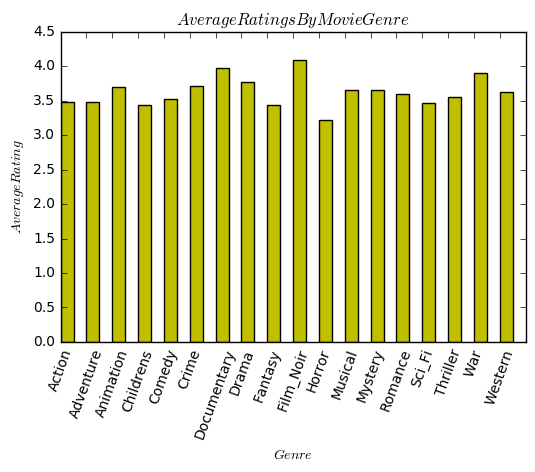

In [494]:
Action = np.array(data[data["movie_genre_Action"]==1])
Adventure = np.array(data[data["movie_genre_Adventure"]==1])
Animation = np.array(data[data["movie_genre_Animation"]==1])
Childrens = np.array(data[data["movie_genre_Childrens"]==1])
Comedy = np.array(data[data["movie_genre_Comedy"]==1])
Crime = np.array(data[data["movie_genre_Crime"]==1])
Documentary = np.array(data[data["movie_genre_Documentary"]==1])
Drama = np.array(data[data["movie_genre_Drama"]==1])
Fantasy = np.array(data[data["movie_genre_Fantasy"]==1])
Film_Noir = np.array(data[data["movie_genre_Film-Noir"]==1])
Horror = np.array(data[data["movie_genre_Horror"]==1])
Musical = np.array(data[data["movie_genre_Musical"]==1])
Mystery = np.array(data[data["movie_genre_Mystery"]==1])
Romance = np.array(data[data["movie_genre_Romance"]==1])
Sci_Fi = np.array(data[data["movie_genre_Sci-Fi"]==1])
Thriller = np.array(data[data["movie_genre_Thriller"]==1])
War = np.array(data[data["movie_genre_War"]==1])
Western = np.array(data[data["movie_genre_Western"]==1])

averageAction=np.mean(Action[:,-1])
averageAdventure = np.mean(Adventure[:,-1])
averageAnimation = np.mean(Animation[:,-1])
averageChildrens = np.mean(Childrens[:,-1])
averageComedy = np.mean(Comedy[:,-1])
averageCrime = np.mean(Crime[:,-1])
averageDocumentary = np.mean(Documentary[:,-1])
averageDrama = np.mean(Drama[:,-1])
averageFantasy = np.mean(Fantasy[:,-1])
averageFilm_Noir = np.mean(Film_Noir[:,-1])
averageHorror = np.mean(Horror[:,-1])
averageMusical = np.mean(Musical[:,-1])
averageMystery = np.mean(Mystery[:,-1])
averageRomance = np.mean(Romance[:,-1])
averageSci_Fi = np.mean(Sci_Fi[:,-1])
averageThriller = np.mean(Thriller[:,-1])
averageWar = np.mean(War[:,-1])
averageWestern = np.mean(Western[:,-1])


averagesByMovieGenre=np.array([averageAction, averageAdventure, averageAnimation, averageChildrens, averageComedy, averageCrime, averageDocumentary, averageDrama,averageFantasy,averageFilm_Noir,averageHorror,averageMusical,averageMystery,averageRomance,averageSci_Fi,averageThriller,averageWar,averageWestern])


plt.figure()

plt.bar(range(18),averagesByMovieGenre , 0.5, color="y")
plt.xticks(range(18), ["Action","Adventure","Animation","Childrens","Comedy","Crime","Documentary","Drama","Fantasy","Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi","Thriller","War","Western"],rotation=70)

plt.xlabel("$Genre$")
plt.ylabel("$Average Rating$") #$$ change apearence of font
plt.title("$Average Ratings By Movie Genre$")
plt.savefig("Average Ratings By Movie Genre.png") #to save the file

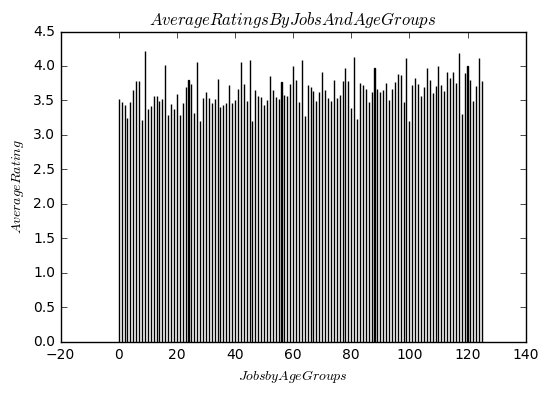

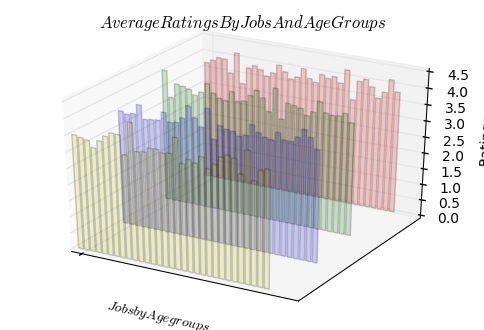

In [495]:
from mpl_toolkits.mplot3d import Axes3D

def averageByAgeAndjob(data):
    allAverages = np.array([])
    for age in ["age_-18","age_18-24","age_25-34","age_35-44","age_45-49","age_50-55","age_56+"]:
        for job in ["movie_genre_Action","movie_genre_Adventure","movie_genre_Animation","movie_genre_Childrens","movie_genre_Comedy","movie_genre_Crime","movie_genre_Documentary","movie_genre_Drama","movie_genre_Fantasy","movie_genre_Film-Noir","movie_genre_Horror","movie_genre_Musical","movie_genre_Mystery","movie_genre_Romance","movie_genre_Sci-Fi","movie_genre_Thriller","movie_genre_War","movie_genre_Western"]:
            category=np.array(data[(data[age]==1) & (data[job]==1)])
            average=np.mean(category[:,-1])
            allAverages=np.append(allAverages,average)
    return allAverages

test=averageByAgeAndjob(data)

plt.figure()
plt.bar(range(len(test)),test , 0.0001, color="y",align='center',hatch="x")

plt.xlabel("$Jobs by AgeGroups$")
plt.ylabel("$Average Rating$") #$$ change apearence of font
plt.title("$Average Ratings By Jobs And AgeGroups$")

plt.savefig("Average Ratings By Jobs And AgeGroups1.png") #to save the file

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c, z in zip(['r', 'g', 'b', 'y'], [40,30,20,10,0]):
    
    
    start=len(test)*(z-10)/40
    end=len(test)*z/40
    
    ys = test[start:end]
    xs = np.arange(len(ys))
    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.2,edgecolor = "none")
    
plt.title("$Average Ratings By Jobs And AgeGroups$")
ax.set_xlabel('$Jobs by Age groups$')
ax.set_zlabel('Ratings')

plt.xticks([1],[""])
plt.yticks([1],[""])
plt.savefig("Average Ratings By Jobs And AgeGroups2.png") #to save the file

## Building a predictive model

Data matrices for training and making predictions.

In [6]:
import numpy as np
X_train = data.drop('target', axis=1)                   # This is the data matrix you already loaded (training data)
y_train = data['target'].values                         # These are the target values encoded as categorical variables
print 'Dimensions X_train=', X_train.shape, 'y_train=', y_train.shape
X_valid = data_io.read_as_df(basename, 'valid')

X_test = data_io.read_as_df(basename, 'test')

Dimensions X_train= (105000, 54) y_train= (105000L,)
Reading public_data/movierec_valid from AutoML format
Number of examples = 15000
Number of features = 54
Reading public_data/movierec_test from AutoML format
Number of examples = 30000
Number of features = 54


The initial classifier in your starting kit (in the sample_code directory).

In [7]:
import regressor
reload(regressor)                               # If you make changes to your code you have to reload it
from regressor import Regressor
Regressor??

Train, run, and save your classifier and your predictions. If you saved a trained model and/or prediction results, the evaluation script will look for those and use those in priority [(1) use saved predictions; (2) if no predictions, use saved model, do not retrain, just test; (3) if neither, train and test model from scratch]. Compute the predictions with predict_proba, this is more versatile.

In [8]:
%time 
result_dir = 'res/'
outname = result_dir + dataname
%timeit 
clf = Regressor()
clf.fit(X_train, y_train)
Y_valid = clf.predict(X_valid)
Y_test = clf.predict(X_test)
clf.save(outname)
#clf.load(outname) # Uncomment to check reloading works
data_io.write(outname + '_valid.predict', Y_valid)
data_io.write(outname + '_test.predict', Y_test)

!ls $outname*

Wall time: 0 ns


'ls' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


Compute the training accuracy.

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
# Directly predicts

y_predict = clf.predict(X_train)

print 'valid accuracy =', eval.mse(y_train, y_predict)

valid accuracy = 0.0


Compute cross-validation accuracy. This is usually worse than the training accuracy. Notice that we internally split the training data into training and validation set (this is because we do NOT have the labels of X_valid and X_test).

In [10]:
from sklearn.cross_validation import StratifiedShuffleSplit
# This is just an example of 2-fold cross-validation
skf = StratifiedShuffleSplit(y_train, n_iter=5, test_size=0.5, random_state=0)
i=0
for idx_t, idx_v in skf:
    i=i+1
    Xtr = X_train.iloc[idx_t]
    Ytr = y_train[idx_t]
    Xva = X_train.iloc[idx_v]
    Yva = y_train[idx_v]
    clf = Regressor()
    clf.fit(Xtr, Ytr)
    Y_predict = clf.predict(Xva)
    print 'Fold', i, 'validation accuracy = ', eval.mae(Y_predict, Yva)

Fold 1 validation accuracy =  0.926533333333
Fold 2 validation accuracy =  0.933333333333
Fold 3 validation accuracy =  0.93540952381
Fold 4 validation accuracy =  0.925142857143
Fold 5 validation accuracy =  0.927980952381


It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>regressor.py</code> in the <code>sample_code/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission.  The program looks for saved results and saved models in the subdirectory <code>res/</code>. If it finds them, it will use them: (1) If results are found, then are copied to the output directory; (2) If no results but a trained model is found, it is reloaded and no training occurs; (3) If nothing is found a fresh model is trained and tested.

In [11]:
outdir = '../outputs'        # If you use result_dir as output directory, your submission will include your results

In [12]:
!python run.py $datadir $outdir

Using input_dir: public_data/
Using output_dir: C:\Users\Mehdi\Documents\outputs
************************************************************************
****** Attempting to copy files (from res/) for RESULT submission ******
************************************************************************
[+] Movierec copied
[+] Results copied to output directory, no model trained/tested
========= Zipping this directory to prepare for submit ==============
See: ../sample_submission_17-03-19-13-04.zip
[+] Done
[+] Overall time spent  4.03 sec ::  Overall time budget  0.00 sec


## Making your submission

The test program <code>run.py</code> prepares your <code>zip</code> file, ready to go. You find it in the directory above where you ran your program. For large datasets, we recommend that <b><span style="color:red">you do NOT bundle the data with your submission</span></b>. The data directory is passed as an argument to run.py, and it is already there on the test server.